# Looking at bootstrapped data
Checking that the distribution of values obtained from bootstrapping looks close enough to normal distributions that normal error propagation can be used.

## Import packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import uncertainties as uc

## Set plot parameters

In [3]:
plt.style.use(['seaborn-deep'])
# plt.style.use(['fivethirtyeight'])


# Font for labels
plt.rcParams['font.family'] = 'serif'

# Linewidths for plots
plt.rcParams['lines.linewidth'] = 1.6
plt.rcParams['lines.marker'] = 'x'

# Axes
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = True


# Ticks
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Legend
plt.rcParams['legend.fontsize'] = 16

## Save folder

In [5]:
SAVE_DIR = "./saved_figs/J01_bootstrap/"

## Frequency scans
Start by getting data from file

In [18]:
fname = ('G:\My Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data'
         '\SPA_test_11_9_2021_bootstrap.hdf')

run_name_freq_R0F2 = "1636486496 Scan SPA J = 0 to 1 microwave frequency"
df_freq_R0F2 = pd.read_hdf(fname, run_name_freq_R0F2)

run_name_freq_R1F3 = "1636493528 Accumulation on R(1), F = 3, SPA J = 0 to 1 microwave frequency scan"
df_freq_R1F3 = pd.read_hdf(fname, run_name_freq_R1F3)

In [19]:
df_freq_R0F2

,IntegratedFluorescence_ON,GaussianFitAmplitude_ON,GaussianFitCenterX_ON,GaussianFitCenterY_ON,GaussianFitSigmaX_ON,GaussianFitSigmaY_ON,IntegratedFluorescence_OFF,GaussianFitAmplitude_OFF,GaussianFitCenterX_OFF,GaussianFitCenterY_OFF,GaussianFitSigmaX_OFF,GaussianFitSigmaY_OFF,SPAJ01Frequency
0,24672.100096,9.519587,187.496920,283.667218,16.300096,50.611356,16095.312571,6.110224,187.643439,283.785578,16.392627,51.149790,1.333200e+10
1,20326.720063,7.776857,187.521476,283.937080,16.277183,51.113320,18644.054874,7.154452,187.366028,283.150879,16.397788,50.585828,1.333300e+10
2,18614.601309,7.149425,187.495365,284.047480,16.328337,50.756402,22710.544395,8.688606,187.600444,282.398667,16.234964,51.247918,1.333400e+10
3,7829.496555,2.810399,188.444200,285.274559,16.704448,53.086471,23495.475613,9.010282,187.805607,284.330824,16.529297,50.215941,1.333500e+10
4,5152.002114,2.015402,187.452148,282.290450,16.213080,50.187884,27333.070189,10.421894,187.571780,282.667373,16.402306,50.896388,1.333600e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30995,24526.613753,9.473301,187.387816,284.243978,16.387629,50.288682,24201.127816,9.332082,187.374905,284.357303,16.382875,50.386832,1.334800e+10
30996,17413.415221,6.543936,187.657936,284.071185,16.723700,50.648042,26774.660512,10.181818,187.535708,284.522831,16.473779,50.810742,1.334900e+10
30997,18882.020388,7.196164,187.521738,284.664224,16.536041,50.508678,19906.070305,7.518426,187.599693,284.422370,16.604043,50.756875,1.335000e+10
30998,24514.996200,9.331006,187.603990,284.192347,16.476409,50.756413,19262.573707,7.391988,187.529574,284.182615,16.357149,50.710229,1.335100e+10


### Make histograms for each frequency for depletion

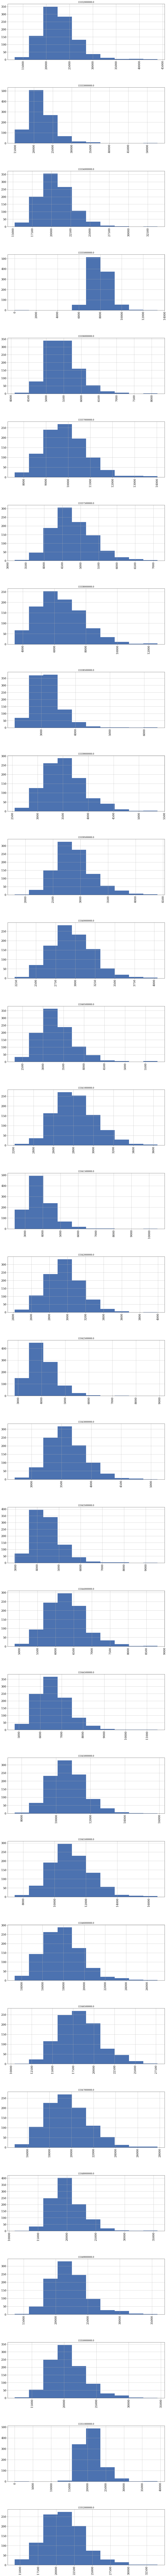

In [20]:
n_freq = len(df_freq_R0F2.SPAJ01Frequency.value_counts())
df_freq_R0F2.hist(by = "SPAJ01Frequency", column = "IntegratedFluorescence_ON",layout = (n_freq,1), figsize = (16,9*n_freq));

### Make histograms for each frequency for accumulation (R(1), F' = 3

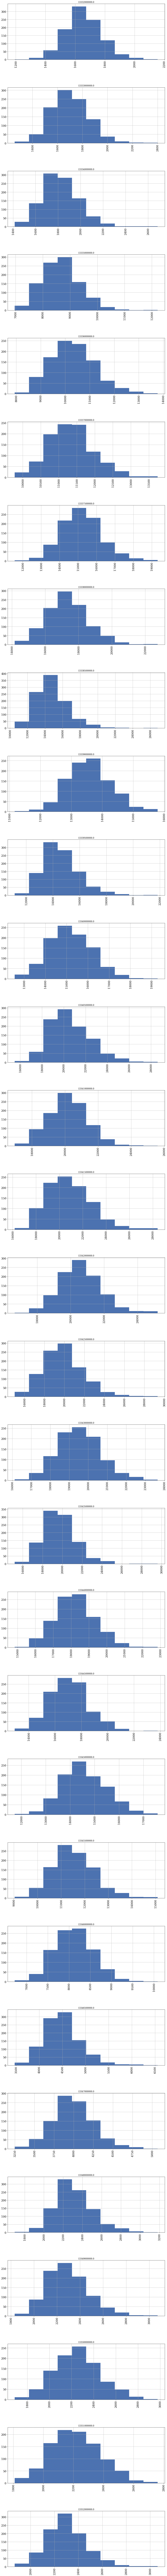

In [17]:
n_freq = len(df_freq_R1F3.SPAJ01Frequency.value_counts())
df_freq_R1F3.hist(by = "SPAJ01Frequency", column = "IntegratedFluorescence",layout = (n_freq,1), figsize = (16,9*n_freq));

## Microwave power scans
Start by getting data from file

In [21]:
fname = ('G:\My Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data'
         '\SPA_test_11_9_2021_bootstrap.hdf')

run_name_pow_R0F2 = "1636488188 Scan SPA J = 0 to 1 microwave power"
df_pow_R0F2 = pd.read_hdf(fname, run_name_pow_R0F2)

run_name_pow_R1F3 = "1636492543 Accumulation on R(1), F = 3, SPA J = 0 to 1 microwave power scan"
df_pow_R1F3 = pd.read_hdf(fname, run_name_pow_R1F3)

### Histograms for each power for depletion of R(0), F = 2

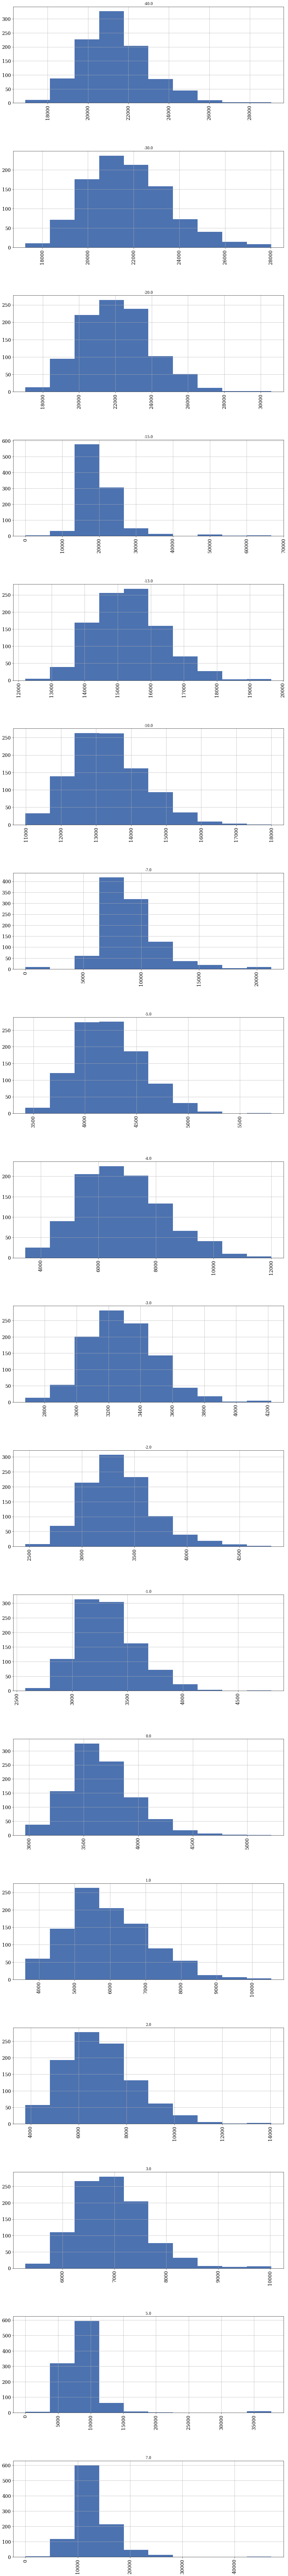

In [23]:
n_power = len(df_pow_R0F2.SPAJ01Power.value_counts())
df_pow_R0F2.hist(by = "SPAJ01Power", column = "IntegratedFluorescence_ON",layout = (n_freq,1), figsize = (16,9*n_freq));

### Histograms for each power for accumulation on R(1), F = 3

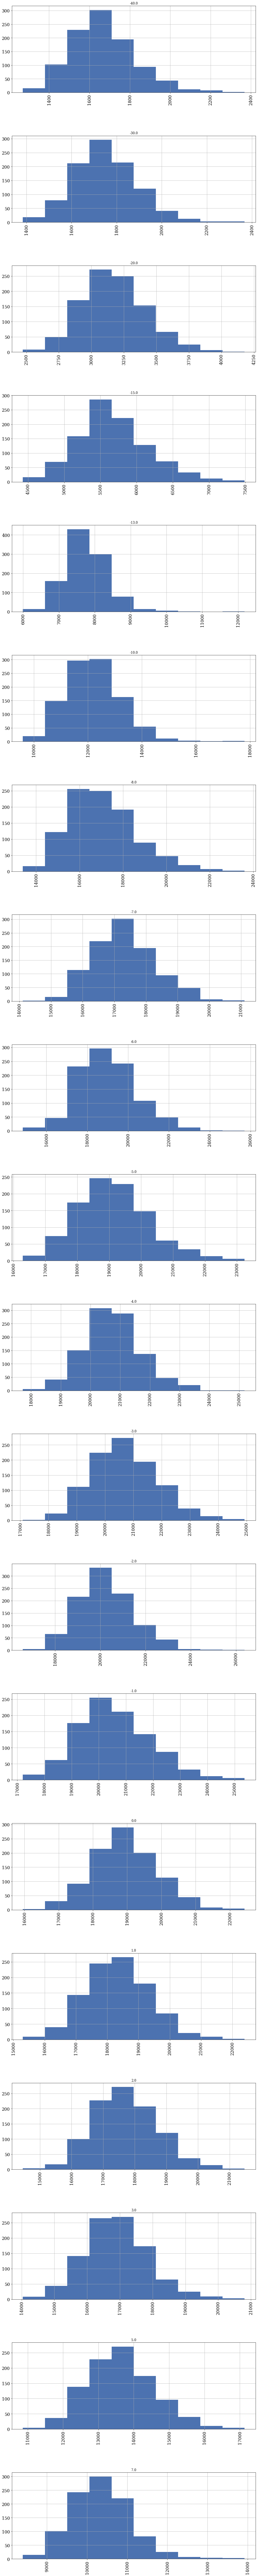

In [25]:
n_power = len(df_pow_R1F3.SPAJ01Power.value_counts())
df_pow_R1F3.hist(by = "SPAJ01Power", column = "IntegratedFluorescence",layout = (n_freq,1), figsize = (16,9*n_freq));